# Neuronale Netze mit SKlearn

In dieser Übung werden wir ein simples neuronales Netz für eine reale Aufgabe (Nummern-Erkennung) mit Hilfe des MLP-Klassifikators (Multi-layer Perceptron) von **scikit-learn** implementieren.

Die Bibliothek scikit-learn ist bekannt dafür, robuste und effiziente Werkzeuge für maschinelles und statistisches Lernen bereitzustellen, einschließlich Methoden wie Regression, Klassifizierung und Clustering. Ein Teil dieser Bibliothek ermöglicht es uns auch, mit neuronalen Netzen zu arbeiten, insbesondere mit mehrschichtigen Perceptrons (MLP).

Ein mehrschichtiges Perceptron (MLP) ist ein vollständig verbundenes künstliches neuronales Netzwerk. Es besteht aus mindestens drei Schichten: einer Eingabeschicht, einer oder mehreren versteckten Schichten und einer Ausgabeschicht. Jede Schicht, außer der Eingabeschicht, enthält Knoten (Neuronen), die nichtlineare Aktivierungsfunktionen wie ReLU verwenden, um komplexe und abstrakte Merkmale aus den Eingabedaten zu lernen.

Die Klasse MLPClassifier in scikit-learn verwendet eine überwachte Lernmethode namens Backpropagation zum Training des Modells. Durch seine mehreren Schichten und nichtlinearen Aktivierungsfunktionen kann ein MLP-Modell Daten klassifizieren, die nicht linear trennbar sind. Das unterscheidet es von linearen Modellen.

Manchmal werden mehrschichtige Perceptrons als "einfache" neuronale Netze bezeichnet, besonders wenn sie nur eine einzige versteckte Schicht haben.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [20]:
digits = pd.read_csv("handgeschriebenen_Bilder.csv")
digits

Unnamed: 0  label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  \
0               0      1       0       0       0       0       0       0   
1               1      0       0       0       0       0       0       0   
2               2      1       0       0       0       0       0       0   
3               3      4       0       0       0       0       0       0   
4               4      0       0       0       0       0       0       0   
...           ...    ...     ...     ...     ...     ...     ...     ...   
30196       30196      5       0       0       0       0       0       0   
30197       30197      7       0       0       0       0       0       0   
30198       30198      1       0       0       0       0       0       0   
30199       30199      4       0       0       0       0       0       0   
30200       30200      3       0       0       0       0       0       0   

       pixel6  pixel7  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0       0  ...         0         0         0         0         0   
1           0       0  ...         0         0         0         0         0   
2           0       0  ...         0         0         0         0         0   
3           0       0  ...         0         0         0         0         0   
4           0       0  ...         0         0         0         0         0   
...       ...     ...  ...       ...       ...       ...       ...       ...   
30196       0       0  ...         0         0         0         0         0   
30197       0       0  ...         0         0         0         0         0   
30198       0       0  ...         0         0         0         0         0   
30199       0       0  ...         0         0         0         0         0   
30200       0       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
30196         0         0         0         0         0  
30197         0         0         0         0         0  
30198         0         0         0         0         0  
30199         0         0         0         0         0  
30200         0         0         0         0         0  

[30201 rows x 786 columns]

In [21]:
# Entfernen der ersten Spalte (meistens ein Index oder eine ID-Spalte)
digits = digits.drop(digits.columns[0], axis=1)

# Extrahieren der Labels (Ziffern) aus dem Datensatz
labels = digits['label']

# Entfernen der Label-Spalte aus dem Datensatz und Konvertierung der restlichen Daten in ein numpy-Array
digits = np.array(digits.drop('label', axis=1)).astype('float')

# Überprüfen der Formen der Arrays für Bilder und Labels
digits.shape, labels.shape


((30201, 784), (30201,))

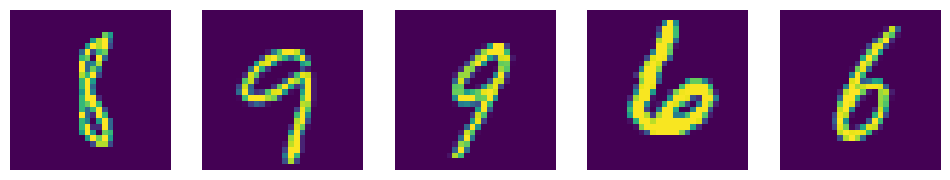

In [22]:
# Festlegen der Größe der Darstellung
plt.figure(figsize=(12, 4))

# Plotten von 5 zufällig ausgewählten Ziffernbildern
for i in range(5):
    # Erstellen eines Subplots für jedes Bild
    plt.subplot(1, 5, i+1)
    # Auswählen eines zufälligen Bildes aus dem Datensatz und Umformen auf 28x28 Pixel
    plt.imshow(random.choice(digits).reshape(28, 28))
    # Ausschalten der Achsenbeschriftungen für eine saubere Darstellung
    plt.axis("off")

# Anzeigen der geplotteten Bilder
plt.show()

### Trainings- und Testdatensätze erstellen

In [23]:
# Festlegen des Verhältnisses für das Aufteilen der Daten in Trainings- und Testdatensatz
split = 0.7, 0.3 # 70% für Training, 30% für Test

# Normalisieren der Bilddaten auf den Bereich [0, 1]
digits /= 255.0

# Berechnen des Index für das Aufteilen der Daten
split_ind = int(len(digits) * split[0])

# Aufteilen der Daten in Trainings- und Testdatensatz
X_train, X_test = digits[:split_ind], digits[split_ind:]
y_train, y_test = labels[:split_ind], labels[split_ind:]

# Ausgeben der Formen der aufgeteilten Datensätze
print(X_train.shape, X_test.shape)


(21140, 784) (9061, 784)


In [24]:
# Initialisieren und Trainieren des MLPClassifier mit den Standardparametern
model = MLPClassifier().fit(X_train, y_train)

# Vorhersagen der Labels für den Testdatensatz
y_pred = model.predict(X_test)

# Ausgeben der Genauigkeit des Modells
print(f"Using MLPClassifier with the default parameter values gives an accuracy of {accuracy_score(y_pred, y_test)}")

# Ausgeben des Klassifikationsberichts, der detaillierte Leistungskennzahlen enthält
print(classification_report(y_pred, y_test))


Using MLPClassifier with the default parameter values gives an accuracy of 0.9617040061803332
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       893
           1       0.99      0.98      0.98       971
           2       0.97      0.95      0.96       937
           3       0.93      0.95      0.94       903
           4       0.96      0.96      0.96       870
           5       0.96      0.95      0.96       837
           6       0.98      0.96      0.97       913
           7       0.97      0.97      0.97       985
           8       0.94      0.96      0.95       876
           9       0.94      0.96      0.95       876

    accuracy                           0.96      9061
   macro avg       0.96      0.96      0.96      9061
weighted avg       0.96      0.96      0.96      9061



### Bericht über die Modellleistung:

**Accuracy (Genauigkeit):** Die Genauigkeit misst, wie viele der insgesamt klassifizierten Instanzen richtig erkannt wurden. In Deinem Fall beträgt die Genauigkeit 96%, das bedeutet, dass der MLPClassifier etwa 96% der Instanzen korrekt klassifiziert hat.

**Precision (Präzision):** Die Präzision gibt an, wie viele der als positiv identifizierten Fälle tatsächlich positiv waren. Für jede Klasse (von 0 bis 9) gibt es Präzisionswerte. Beispielsweise bedeutet eine Präzision von 0.98 für Klasse 0, dass von den Fällen, die als Klasse 0 vorhergesagt wurden, etwa 98% tatsächlich Klasse 0 waren.

**Recall (Rückruf):** Der Rückruf zeigt, wie viele der tatsächlich positiven Fälle korrekt erkannt wurden. Wie bei der Präzision gibt es Rückrufwerte für jede Klasse. Ein Recall von 0.97 für Klasse 1 bedeutet, dass etwa 97% der tatsächlich zu Klasse 1 gehörenden Fälle korrekt erkannt wurden.

**F1-Score:** Der F1-Score ist das harmonische Mittel zwischen Präzision und Rückruf. Er ist besonders nützlich, wenn du Präzision und Rückruf in einem Wert zusammenfassen möchtest. Ein hoher F1-Score zeigt, dass sowohl Präzision als auch Rückruf gut sind.

**Support:** Dies ist die Anzahl der tatsächlichen Instanzen jeder Klasse im Datensatz.

**Macro avg:** Dies sind die Durchschnittswerte für Präzision, Rückruf und F1-Score über alle Klassen hinweg.

**Weighted avg:** Dies sind die gewichteten Durchschnittswerte für Präzision, Rückruf und F1-Score, wobei die Gewichtung von der Anzahl der Instanzen jeder Klasse abhängt.

Das Ergebnis zeigt, dass Dein MLPClassifier insgesamt eine hohe Genauigkeit von etwa 96% erreicht hat. Er erzielt zudem gute Präzisions-, Rückruf- und F1-Scores für die meisten Klassen. Das bedeutet, dass dein Modell gut darin ist, die handgeschriebenen Ziffern aus Deinem Datensatz korrekt zu erkennen. 

### Kreuzvalidierung mit RandomizedSearchCV
Zur Überprüfung der Modellleistung verwenden wir die Standardaktivierung "relu" und den Standard-Solver "adam". Kreuzvalidierung ist eine Technik, die verwendet wird, um die Leistung eines Modells zuverlässiger zu bewerten. Anstatt das Modell nur einmal auf einem festen Trainings- und Testdatensatz zu trainieren und zu testen, teilt die Kreuzvalidierung die Daten in mehrere Teile (Folds). Das Modell wird dann mehrfach trainiert und getestet, wobei in jedem Durchgang unterschiedliche Teile der Daten als Trainings- und Testdatensätze verwendet werden. Dies hat mehrere Vorteile:

1. Zuverlässigere Leistungsbewertung: Da das Modell auf verschiedenen Teilmengen der Daten getestet wird, liefert es eine robustere Einschätzung seiner Leistung.
2. Bessere Nutzung der Daten: Durch das wiederholte Training und Testen wird die gesamte Datenmenge effizienter genutzt.
3. Vermeidung von Überanpassung: Kreuzvalidierung hilft, das Risiko der Überanpassung an einen bestimmten Datensatz zu reduzieren.

Anstelle von GridSearchCV verwenden wir hier RandomizedSearchCV, um die Trainingszeit zu verkürzen. Bei RandomizedSearchCV werden nicht alle möglichen Parameterkombinationen ausprobiert, sondern eine feste Anzahl von Parametereinstellungen zufällig aus den angegebenen Verteilungen ausgewählt.

Mit dem MLPClassifier von scikit-learn können wir die Kreuzvalidierungsmethode nutzen, um die folgenden Parameter zu optimieren:

- hidden_layer_sizes: Ein Tupel, das die Anzahl der Neuronen in den versteckten Schichten angibt. Zum Beispiel bedeutet (100,), dass eine versteckte Schicht mit 100 Neuronen verwendet wird.
- alpha: Ein Gleitkommawert (default=0.0001), der die Stärke der L2-Regularisierung angibt. Dies hilft, Überanpassung zu vermeiden.
- max_iter: Eine ganze Zahl (default=200), die die maximale Anzahl der Iterationen festlegt. Dies ist die maximale Anzahl der Epochen, die der Solver durchläuft, bis er konvergiert oder diese Anzahl erreicht.
- learning_rate_init: Ein Gleitkommawert (default=0.001), der die anfängliche Lernrate bestimmt. Diese steuert die Schrittgröße bei der Aktualisierung der Gewichte.

Obwohl RandomizedSearchCV effizienter ist, da es weniger Parameterkombinationen testet, sollten wir dennoch erwarten, dass das Training länger dauert (3-4 min) als das Training eines einzelnen Modells, da mehrere Parameterkonfigurationen ausprobiert werden.

In [25]:
# Definieren der Parameter, die optimiert werden sollen
parameters = {
    'hidden_layer_sizes': [50, 100, 200],  # Verschiedene Anzahlen von Neuronen in der versteckten Schicht
    'alpha': [0.001, 0.01, 0.1],  # Stärke des L2-Regularisierungsterms
    'max_iter': [200, 500, 800],  # Maximale Anzahl von Iterationen
    'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]  # Anfängliche Lernrate
}

# Initialisieren des MLPClassifier
model = MLPClassifier()

# Initialisieren von RandomizedSearchCV mit den definierten Parametern
clf = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)

# Verkleinern des Trainingsdatensatzes, um die Trainingszeit zu verkürzen
clf.fit(X_train[:3000], y_train[:3000])

# Ausgeben der besten gefundenen Parameter
print("Die besten gefundenen Parameter sind:\n")
print(clf.best_params_)

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Die besten gefundenen Parameter sind:

{'max_iter': 500, 'learning_rate_init': 0.01, 'hidden_layer_sizes': 200, 'alpha': 0.001}


Jetzt können wir das beste Modell verwenden, das den optimalsten Satz von Parameterwerten verwendet, der von RandomSearchCV gefunden wurde, kreuzvalidiert auf einer Teilmenge des Trainingssatzes, um Vorhersagen für den Testsatz X_test zu machen und seine Leistung zu bewerten.

Wir wählen die beste Regularisierungsmethode anhand der Validierungsdaten aus.

Die Genauigkeit des besten Modells beträgt 0.9354375896700143

Die Genauigkeit des besten Modells beträgt 0.9354375896700143
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       905
           1       0.98      0.96      0.97       986
           2       0.93      0.93      0.93       920
           3       0.90      0.93      0.91       896
           4       0.93      0.92      0.92       873
           5       0.93      0.91      0.92       839
           6       0.95      0.95      0.95       897
           7       0.95      0.94      0.95       984
           8       0.92      0.94      0.93       881
           9       0.90      0.92      0.91       880

    accuracy                           0.94      9061
   macro avg       0.93      0.93      0.93      9061
weighted avg       0.94      0.94      0.94      9061



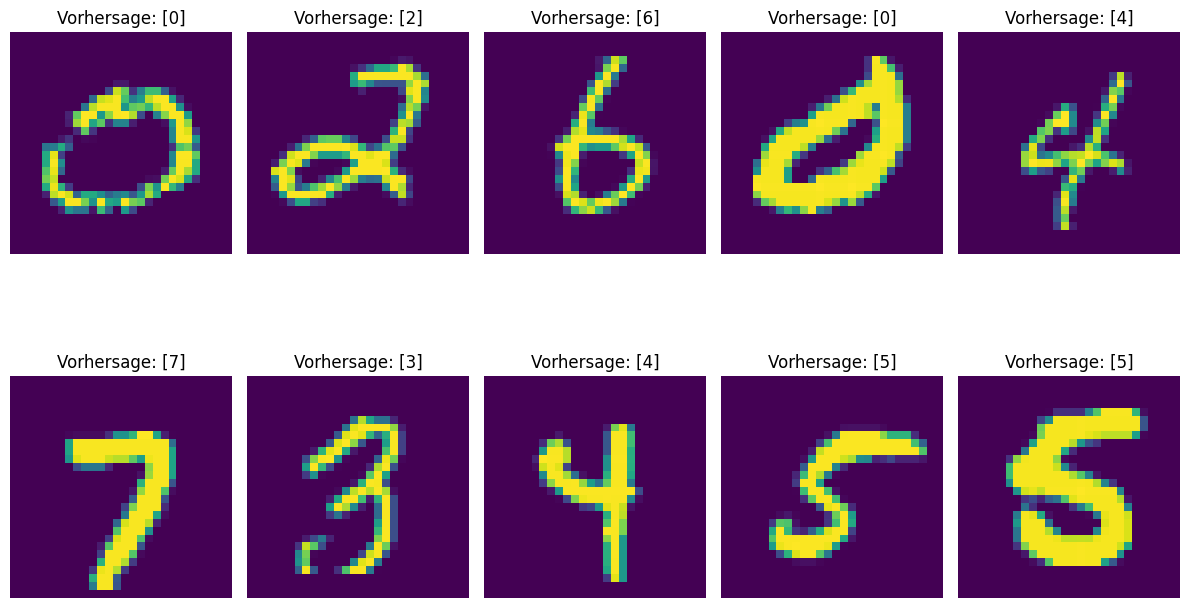

In [26]:
# Speichere das beste gefundene Modell in "bestmodel"
bestmodel = clf.best_estimator_

# Vorhersagen auf den Testdaten mit dem besten Modell
y_pred = bestmodel.predict(X_test)

# Ausgabe der Genauigkeit des besten Modells
print(f"Die Genauigkeit des besten Modells beträgt {accuracy_score(y_test, y_pred)}\n")

# Visualisierung einiger Testbilder und deren Vorhersagen
plt.figure(figsize=(12,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Zufällige Auswahl eines Testbildes
    sample = random.choice(X_test)
    # Vorhersage für das Testbild
    pred = bestmodel.predict(sample.reshape(1,-1))
    plt.imshow(sample.reshape(28,28))
    plt.title(f"Vorhersage: {pred}")
    plt.axis("off")

plt.tight_layout()

# Ausgabe der Genauigkeit des besten Modells erneut
print(f"Die Genauigkeit des besten Modells beträgt {accuracy_score(y_pred, y_test)}")

# Ausgabe des Klassifikationsberichts für die Vorhersagen
print(classification_report(y_pred, y_test))


Es ist wichtig zu beachten, dass wir beim zweiten Durchlauf mit abgestimmten Hyperparametern eine "ConvergenceWarning" erhalten haben, was darauf hindeutet, dass der Optimierungsprozess möglicherweise nicht innerhalb der angegebenen maximalen Anzahl von Iterationen (in diesem Fall 200) vollständig konvergiert hat. Wir können in Erwägung ziehen, den max_iter-Parameter zu erhöhen oder andere Anpassungen vorzunehmen, um dieser Warnung zu begegnen, falls erforderlich.

Insgesamt erreichte unser abgestimmtes Modell eine etwas geringere Genauigkeit als das Modell mit Standardparametern, aber die Abstimmung der Hyperparameter kann manchmal auch andere Aspekte der Modellleistung verbessern, z. B. die Generalisierung auf neue Daten oder die Stabilität. Die spezifische Wahl der Hyperparameter kann von dem gewählten Datensatz und Problem abhängen, so dass wir eine weitere Feinabstimmung vornehmen oder andere Einstellungen ausprobieren könnten.